In [40]:
from cvrp_algorithms import SimpleAco, AcoSigmaBestAnts, AcoImprovedPheromoneUpdate, Aco2opt, Greedy
import cvrpcases as cvrp
from array import *
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.backends.backend_pdf import PdfPages

def listToString(list):
    str1 = ''   
    for ele in list:  
        str1 += str(ele)+'\n' 
    str1 = str1[:-2] 
    return str1  

def saveFile(firstLine, vector, file):
    text_file = open(file, "w+")
    text_file.write(firstLine+'\n')
    n = text_file.write(listToString(vector))
    text_file.close()

def readVector(file):
    file1 = open(file, 'r') 
    Lines = file1.readlines() 
    v = np.zeros(len(Lines)-1)
    for it in range(len(v)):
        v[it] = float(Lines[it+1])
    return v

In [2]:
 algorithm = Greedy(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'))
 algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=100, beta=1, evaporation_rate=0.6, pheromone_amount=20, seed = 78)
 #algorithm = AcoSigmaBestAnts(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
 #algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
#algorithm = Aco2opt(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, seed = 78)

solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

# sprawdzenie czy poprawnie obliczono koszt rozwiązania
# sum = 0
# v1 = path[0]
# for v2 in path[1:]:
#     sum += case.graph[v1][v2]['weight']
#     v1 = v2
# print("Suma wag: "+str(sum))

Solution: 1021.4545306827588
Path: [1, 28, 25, 15, 27, 31, 17, 2, 1, 13, 8, 14, 22, 32, 20, 19, 1, 21, 6, 26, 11, 16, 30, 23, 10, 9, 1, 7, 4, 3, 24, 29, 5, 12, 1, 18, 1]


In [3]:
algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 983.7216225346679
Path: [1, 23, 10, 16, 11, 26, 6, 21, 30, 19, 9, 27, 1, 31, 17, 13, 2, 8, 22, 1, 5, 12, 29, 24, 3, 4, 7, 15, 1, 18, 20, 32, 14, 25, 1, 28, 1]


In [4]:
algorithm = AcoSigmaBestAnts(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 920.6451355961169
Path: [1, 16, 23, 10, 29, 5, 12, 9, 19, 30, 1, 21, 6, 11, 26, 24, 4, 3, 7, 15, 27, 1, 18, 20, 32, 22, 14, 8, 1, 2, 17, 31, 25, 28, 1, 13, 1]


In [5]:
algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 957.0329987614714
Path: [1, 19, 30, 12, 5, 29, 4, 3, 24, 7, 27, 1, 21, 6, 16, 11, 26, 10, 23, 9, 15, 1, 2, 22, 20, 18, 32, 14, 1, 28, 25, 31, 17, 13, 1, 8, 1]


In [6]:
algorithm = Aco2opt(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 1000.0833104524698
Path: [1, 3, 4, 24, 5, 12, 9, 29, 19, 11, 30, 1, 31, 27, 8, 17, 13, 2, 15, 6, 1, 22, 18, 20, 32, 14, 28, 1, 7, 10, 23, 16, 26, 21, 1, 25, 1]


In [11]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_1[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_1)

t
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
15
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
17
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
19
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test

In [5]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - AcoSigmaBestAnts")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_2[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_2)

]
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
17
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
19
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
te

In [7]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - AcoImprovedPheromoneUpdate")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_3[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_3)

Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - AcoImprovedPheromoneUpdate
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
[[[1198.40869257607, 1074.4402585962584, 1068.5371973284864, 1160.9875094078075, 1315.1161630551871, 1154.466278589702], [1159.1423674093771, 1002.9753750008464, 1105.2466047354092, 1264.4228303938467, 1259.1121072924022, 1206.6541608439597], [1203.0176511333298, 1001.0186085637918, 1033.4042383764038, 1148.5475142034807, 1301.4931722629276, 1088.856529958396], [1127.2597857847866, 1042.0409171783028, 1139.3463878392633, 1080.0220073541864, 1343.1805087059136, 1149.4080662620847], [1073.0015548818226, 1019.3337012685269, 1015.1416702350549, 1148.5113052104768, 1228.183766259534, 1063.4216592092698]], [[1022.7419989686701, 945.1282362075698, 1032.5737868788897, 1059.7422100744138, 1108.4425907928246, 1059.7465965259616], [109

In [8]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - Aco2opt")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_4 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_4[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_4)

st
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
15
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
17
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
19
test
test
test
test
test
test
test
test
test
test
test
test
test
test
tes

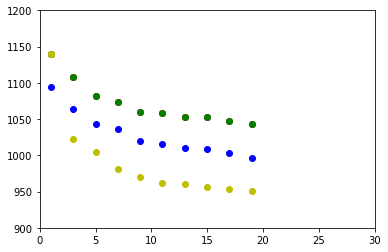

In [12]:
sum = np.zeros(len(hyp1_1))
mean1 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_1[iter][row][col]
            count = count + 1
    mean1[iter] = sum[iter]/count

sum = np.zeros(len(hyp1_1))
mean2 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_2[iter][row][col]
            count = count + 1
    mean2[iter] = sum[iter]/count

sum = np.zeros(len(hyp1_1))
mean3 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_3[iter][row][col]
            count = count + 1
    mean3[iter] = sum[iter]/count

sum = np.zeros(len(hyp1_1))
mean4 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_4[iter][row][col]
            count = count + 1
    mean4[iter] = sum[iter]/count

plt.plot(range(1,200,2), mean1, 'ro',range(1,200,2), mean2, 'go',range(1,200,2), mean3, 'yo',range(1,200,2), mean4, 'bo')
plt.axis([0, 200, 900, 1200])
plt.show()

In [32]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco')

seedCount = 10

#cases =[
#r'datasets\A\A-n32-k5.vrp',
#r'datasets\A\A-n33-k5.vrp',
#r'datasets\A\A-n33-k6.vrp',
#r'datasets\A\A-n34-k5.vrp',
#r'datasets\A\A-n36-k5.vrp',
#r'datasets\A\A-n37-k5.vrp']

cases =[
r'datasets\A\A-n32-k5.vrp']

hyp2_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1[it][seed][cas] = solution

print(hyp2_1)

99692710922], [1723.5273525393668], [1672.6422685957587]], [[1594.3336269891722], [1626.4050244528762], [1614.8930100348612], [1669.442943697856], [1622.5352973989495], [1577.2462427358248], [1590.6381292498725], [1571.499692710922], [1723.5273525393668], [1672.6422685957587]], [[1594.3336269891722], [1626.4050244528762], [1614.8930100348612], [1669.442943697856], [1622.5352973989495], [1577.2462427358248], [1585.0456088388355], [1571.499692710922], [1723.5273525393668], [1672.6422685957587]], [[1594.3336269891722], [1622.5006096857248], [1557.708374082834], [1624.9840673862868], [1622.5352973989495], [1577.2462427358248], [1585.0456088388355], [1569.9266991361646], [1723.5273525393668], [1672.6422685957587]], [[1557.2462033470156], [1622.5006096857248], [1557.708374082834], [1624.9840673862868], [1622.5352973989495], [1577.2462427358248], [1585.0456088388355], [1569.9266991361646], [1673.0214875001607], [1672.6422685957587]], [[1557.2462033470156], [1622.5006096857248], [1557.70837408

In [80]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco')

seedCount = 10

#cases =[
#r'datasets\A\A-n32-k5.vrp',
#r'datasets\A\A-n33-k5.vrp',
#r'datasets\A\A-n33-k6.vrp',
#r'datasets\A\A-n34-k5.vrp',
#r'datasets\A\A-n36-k5.vrp',
#r'datasets\A\A-n37-k5.vrp']

cases =[
r'datasets\A\A-n32-k5.vrp']

hyp2_1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/20, beta=(100-it)/20, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_1[it][seed][cas] = solution

print(hyp2_1_1)

1.5103335741803], [1547.939129375113], [1516.2295715993898], [1566.148926589543], [1454.758875259855], [1469.9133198332756], [1557.8077349093896], [1528.0301119948904], [1445.710237458938]], [[1532.7927235689815], [1552.8791105132423], [1592.1579657183693], [1409.924423028349], [1460.4187175273046], [1454.758875259855], [1501.2402551092423], [1551.8036173987186], [1520.6907156135348], [1445.710237458938]], [[1442.812029207261], [1421.368845567828], [1550.378204293403], [1498.9674719032923], [1460.4187175273046], [1454.758875259855], [1472.5753315745494], [1535.0686467346936], [1382.9957354884025], [1445.710237458938]], [[1442.812029207261], [1418.5246466511464], [1543.325789257665], [1498.9674719032923], [1438.2274470441364], [1424.2274939042775], [1422.2478124007819], [1507.4074617735512], [1382.9957354884025], [1369.0929937020192]], [[1499.9349435655188], [1418.5246466511464], [1451.1653461509125], [1472.9310492466707], [1438.2274470441364], [1449.7391741517986], [1422.2478124007819]

In [84]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco')

seedCount = 10

#cases =[
#r'datasets\A\A-n32-k5.vrp',
#r'datasets\A\A-n33-k5.vrp',
#r'datasets\A\A-n33-k6.vrp',
#r'datasets\A\A-n34-k5.vrp',
#r'datasets\A\A-n36-k5.vrp',
#r'datasets\A\A-n37-k5.vrp']

cases =[
r'datasets\A\A-n32-k5.vrp']

hyp2_1_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/10, beta=(100-it)/10, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_2[it][seed][cas] = solution

print(hyp2_1_2)

4025], [1267.4679561472929]], [[1328.152441056653], [1436.7261573418264], [1419.5925390746015], [1373.8629126428286], [1399.4285199324258], [1478.1433237604945], [1407.109792221003], [1324.090893773511], [1437.9846424340221], [1411.7798908755342]], [[1349.8989935210568], [1462.1039999447994], [1155.508771507785], [1346.0918351012656], [1371.000014346871], [1368.2833530426908], [1379.6474011529217], [1310.4760928559967], [1397.380211413122], [1337.6454853193297]], [[1131.4031495291013], [1242.0909006027455], [1155.508771507785], [1272.7500282770595], [1343.668596164956], [1343.8952912710622], [1342.2743310349053], [1315.9256089049356], [1328.9192839688858], [1322.204662972301]], [[1215.9788137844314], [1242.0909006027455], [1282.2032043806428], [1302.9691486564316], [1253.1670147641023], [1342.3762251344283], [1359.116086649012], [1338.1721718287408], [1326.9965763017815], [1322.204662972301]], [[1241.22290868057], [1314.1440463769866], [1231.9904748411604], [1235.2776924290392], [1252.

In [86]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco')

seedCount = 10

#cases =[
#r'datasets\A\A-n32-k5.vrp',
#r'datasets\A\A-n33-k5.vrp',
#r'datasets\A\A-n33-k6.vrp',
#r'datasets\A\A-n34-k5.vrp',
#r'datasets\A\A-n36-k5.vrp',
#r'datasets\A\A-n37-k5.vrp']

cases =[
r'datasets\A\A-n32-k5.vrp']

hyp2_1_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it, beta=(100-it), evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_3[it][seed][cas] = solution

print(hyp2_1_3)

2972301]], [[1215.9788137844314], [1242.0909006027455], [1282.2032043806428], [1302.9691486564316], [1253.1670147641023], [1342.3762251344283], [1359.116086649012], [1338.1721718287408], [1326.9965763017815], [1322.204662972301]], [[1215.9788137844314], [1242.0909006027455], [1282.2032043806428], [1302.9691486564316], [1253.1670147641023], [1342.3762251344283], [1359.116086649012], [1338.1721718287408], [1326.9965763017815], [1322.204662972301]], [[1215.9788137844314], [1242.0909006027455], [1282.2032043806428], [1302.9691486564316], [1253.1670147641023], [1342.3762251344283], [1359.116086649012], [1338.1721718287408], [1326.9965763017815], [1322.204662972301]], [[1215.9788137844314], [1242.0909006027455], [1282.2032043806428], [1302.9691486564316], [1253.1670147641023], [1342.3762251344283], [1359.116086649012], [1338.1721718287408], [1326.9965763017815], [1322.204662972301]], [[1215.9788137844314], [1242.0909006027455], [1282.2032043806428], [1302.9691486564316], [1253.1670147641023]

In [ ]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - AcoSigmaBestAnts')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_2[it][seed][cas] = solution

print(hyp2_2)

In [ ]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - AcoImprovedPheromoneUpdate')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_3[it][seed][cas] = solution

print(hyp2_3)

In [ ]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - Aco2opt')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_4 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_4[it][seed][cas] = solution

print(hyp2_4)

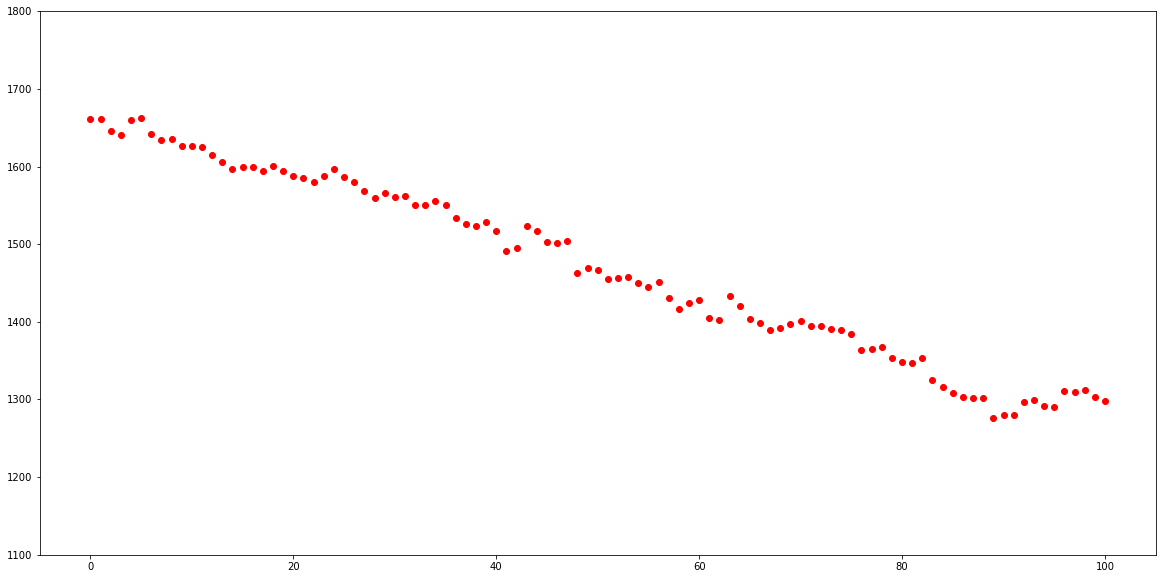

In [40]:
sum = np.zeros(len(hyp2_1))
mean2_1 = np.zeros(len(hyp2_1))
for iter in range (len(hyp2_1)):
    count = 0
    for row in range (len(hyp2_1[0])):
        for col in range(len(hyp2_1[0][0])):
            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
            count = count + 1
    mean2_1[iter] = sum[iter]/count

#sum = np.zeros(len(hyp2_1))
#mean2_1 = np.zeros(len(hyp2_1))
#for iter in range (len(hyp2_1)):
#    count = 0
#    for row in range (len(hyp2_1[0])):
#        for col in range(len(hyp2_1[0][0])):
#            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
#            count = count + 1
#    mean2_2[iter] = sum[iter]/count

#sum = np.zeros(len(hyp2_1))
#mean2_1 = np.zeros(len(hyp2_1))
#for iter in range (len(hyp2_1)):
#    count = 0
#    for row in range (len(hyp2_1[0])):
#        for col in range(len(hyp2_1[0][0])):
#            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
#            count = count + 1
#    mean2_3[iter] = sum[iter]/count

#sum = np.zeros(len(hyp2_1))
#mean2_1 = np.zeros(len(hyp2_1))
#for iter in range (len(hyp2_1)):
#    count = 0
#    for row in range (len(hyp2_1[0])):
#        for col in range(len(hyp2_1[0][0])):
#            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
#            count = count + 1
#    mean2_4[iter] = sum[iter]/count
plt.figure(figsize=(20,10))
plt.plot(range(0,101,1), mean2_1, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
plt.axis([-5, 105, 1100, 1800])
plt.show()

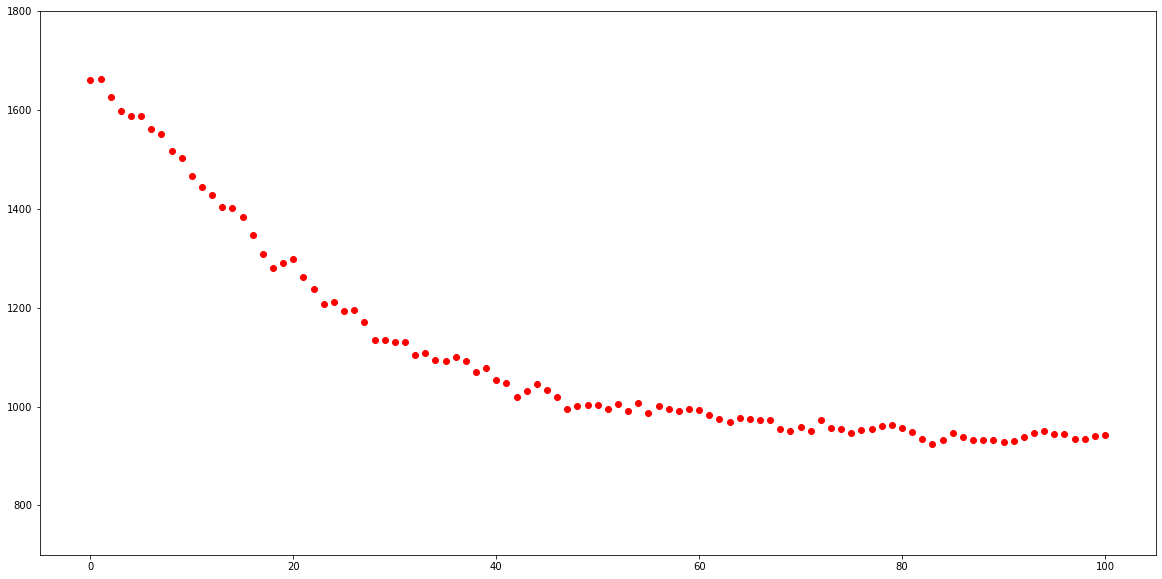

In [82]:
sum = np.zeros(len(hyp2_1))
mean2_1_1 = np.zeros(len(hyp2_1))
for iter in range (len(hyp2_1)):
    count = 0
    for row in range (len(hyp2_1[0])):
        for col in range(len(hyp2_1[0][0])):
            sum[iter] = sum[iter] + hyp2_1_1[iter][row][col]
            count = count + 1
    mean2_1_1[iter] = sum[iter]/count

plt.figure(figsize=(20,10))
plt.plot(range(0,101,1), mean2_1_1, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
plt.axis([-5, 105, 700, 1800])
plt.show()

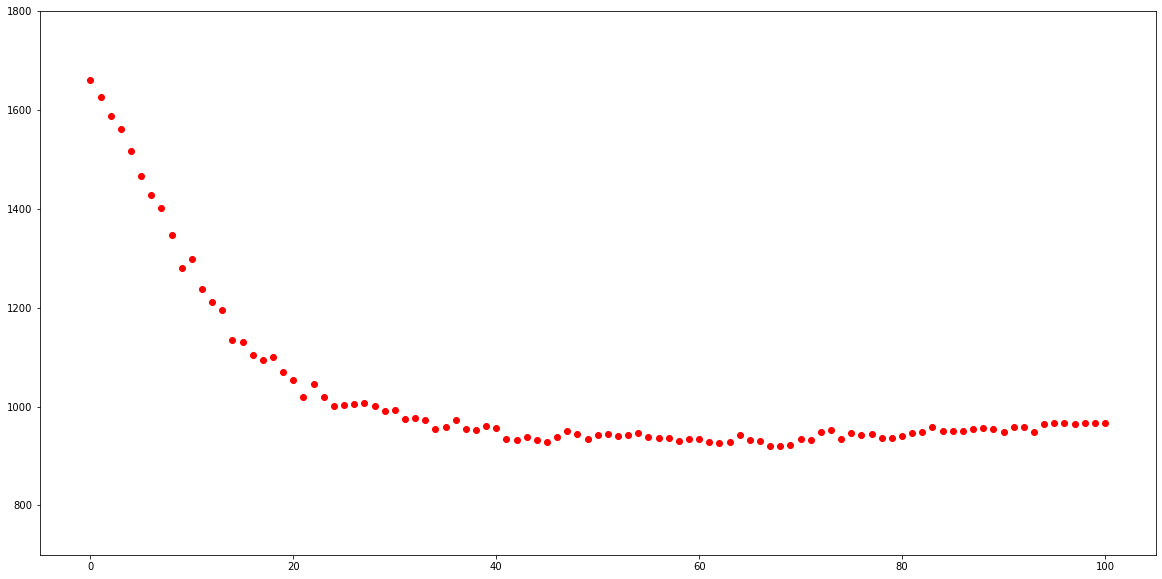

In [85]:
sum = np.zeros(len(hyp2_1))
mean2_1_2 = np.zeros(len(hyp2_1))
for iter in range (len(hyp2_1)):
    count = 0
    for row in range (len(hyp2_1[0])):
        for col in range(len(hyp2_1[0][0])):
            sum[iter] = sum[iter] + hyp2_1_2[iter][row][col]
            count = count + 1
    mean2_1_2[iter] = sum[iter]/count

plt.figure(figsize=(20,10))
plt.plot(range(0,101,1), mean2_1_2, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
plt.axis([-5, 105, 700, 1800])
plt.show()

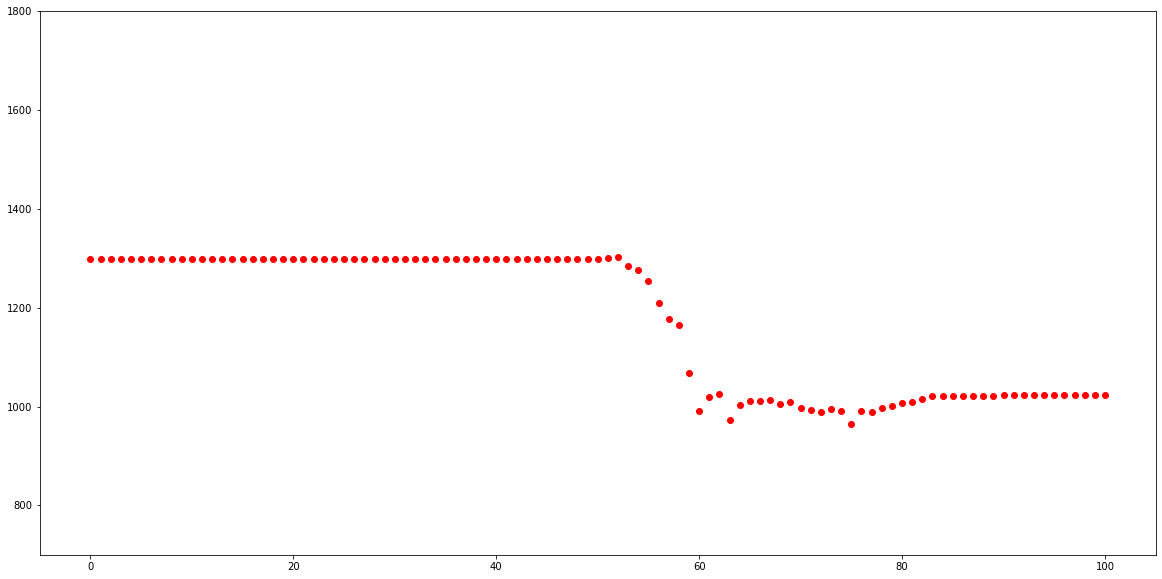

In [88]:
sum = np.zeros(len(hyp2_1))
mean2_1_3 = np.zeros(len(hyp2_1))
for iter in range (len(hyp2_1)):
    count = 0
    for row in range (len(hyp2_1[0])):
        for col in range(len(hyp2_1[0][0])):
            sum[iter] = sum[iter] + hyp2_1_3[iter][row][col]
            count = count + 1
    mean2_1_3[iter] = sum[iter]/count

plt.figure(figsize=(20,10))
plt.plot(range(0,101,1), mean2_1_3, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
plt.axis([-5, 105, 700, 1800])
plt.show()

In [34]:
start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0009739398956298828


In [51]:
with PdfPages(r'charts\test.pdf') as export_pdf:  
    plt.figure(figsize=(20,10))
    plt.plot(range(0,101,1), mean2_1, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
    plt.axis([-5, 105, 1100, 1800])

    export_pdf.savefig()
    plt.close()

In [79]:
text_file = open(r'results\test.txt', "w+")
n = text_file.write(listToString('testee', mean2_1))
text_file.close()

In [4]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_1_0 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_0[it][seed][cas] = solution

print("next")
hyp2_1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/20, beta=(100-it)/20, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_1[it][seed][cas] = solution

print("next")
hyp2_1_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/10, beta=(100-it)/10, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_2[it][seed][cas] = solution

print("next")
hyp2_1_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it, beta=(100-it), evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1_3[it][seed][cas] = solution

print("AcoSigmaBestAnts")

hyp2_2_0 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_2_0[it][seed][cas] = solution

print("next")
hyp2_2_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/20, beta=(100-it)/20, evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_2_1[it][seed][cas] = solution

print("next")
hyp2_2_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/10, beta=(100-it)/10, evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_2_2[it][seed][cas] = solution

print("next")
hyp2_2_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it, beta=(100-it), evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_2_3[it][seed][cas] = solution

print("AcoImprovedPheromoneUpdate")

hyp2_3_0 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_3_0[it][seed][cas] = solution

print("next")
hyp2_3_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/20, beta=(100-it)/20, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_3_1[it][seed][cas] = solution

print("next")
hyp2_3_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/10, beta=(100-it)/10, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_3_2[it][seed][cas] = solution

print("next")
hyp2_3_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it, beta=(100-it), evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_3_3[it][seed][cas] = solution

print("Aco2Opt")

hyp2_4_0 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/20, beta=(100-it)/20, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            solution, path = algorithm.compute(log_level=0)
            hyp2_4_0[it][seed][cas] = solution

print("next")
hyp2_4_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_4_1[it][seed][cas] = solution

print("next")
hyp2_4_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/10, beta=(100-it)/10, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_4_2[it][seed][cas] = solution

print("next")
hyp2_4_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it, beta=(100-it), evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_4_3[it][seed][cas] = solution

hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

KeyboardInterrupt: 

In [ ]:
sum = np.zeros(len(hyp2_1_0))
mean2_1_0 = np.zeros(len(hyp2_1_0))
for iter in range (len(hyp2_1)):
    count = 0
    for row in range (len(hyp2_1_0[0])):
        for col in range(len(hyp2_1_0[0][0])):
            sum[iter] = sum[iter] + hyp2_1_0[iter][row][col]
            count = count + 1
    mean2_1_0[iter] = sum[iter]/count

plt.figure(figsize=(20,10))
plt.plot(range(0,101,1), mean2_1_0, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
plt.axis([-5, 105, 700, 1800])
plt.show()




In [33]:
saveFile('test mobilski',path,r'results/test.txt')


In [41]:
k = readVector(r'results/test.txt')
print(k)



[ 1. 28. 25. 15. 27. 31. 17.  2.  1. 13.  8. 14. 22. 32. 20. 19.  1. 21.
  6. 26. 11. 16. 30. 23. 10.  9.  1.  7.  4.  3. 24. 29.  5. 12.  1. 18.]


In [36]:
kk = '[123]'
v = np.zeros(intkk[1][1:int(kk[1].find(']'))])

NameError: name 'intkk' is not defined

In [19]:
print(v)

0.0


In [22]:
int(kk[1:int(kk.find(']'))])

123